# **Лабораторная работа №1. Первичный анализ набора данных (Pandas)**<a id='intro'></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option("display.max.columns", None)

# Содержание <a id='back'></a>

* [Проверка гипотезы с помощью сводных таблиц](#pivot_table)
* [Этап 1. Обзор данных](#data_review)
    * [Выводы](#data_review_conclusions)
* [Этап 2. Предобработка данных](#data_preprocessing)
    * [2.1 Стили заголовков](#header_style)
    * [2.2 Явные дубликаты](#explicit_duplicates)
    * [2.3 Пропущенные значения](#missing_values)
    * [2.4 НЕявные дубликаты](#implicit_duplicates)
    * [Выводы](#data_preprocessing_conclusions)
* [Этап 3. Проверка гипотез](#hypotheses)
    * [3.1 Гипотеза 1: Число цветных фильмов увеличивается с каждым годом, а число черно-белых соответственно уменьшается](#hypothesis_1)
    * [3.2 Гипотеза 2: Самым популярным жанром фильма во всех странах является комедия, вторым по популярности - ужасы](#hypothesis_2)
    * [3.3 Гипотеза 3: Самые кассовые фильмы США - семейное кино](#hypothesis_3)

# Сводные таблицы <a id='pivot_table'></a>
Реализовать проверку 1 гипотезы из Lab1_Ex1_DataPreprocess.ipynb с помощью pandas.pivot_table 

In [3]:
df_model = pd.read_csv("C:/Users/seito/Jupyter Notebook/data/DataSet1_model.csv")

In [4]:
df_model

,user_id,track,artist,genre,city,time,day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
5,842029A1,Chains,Obladaet,rusrap,Shelbyville,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Springfield,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Springfield,20:47:49,Wednesday
8,8FA1D3BE,L’estate,Julia Dalia,ruspop,Springfield,09:17:40,Friday
9,E772D5C0,Pessimist,unknown,dance,Shelbyville,21:20:49,Wednesday


### Гипотеза 1: Активность пользователей различается в зависимости от дня недели и от города к городу
* Разделите пользователей на группы по городам.
* Сравните, сколько треков играла каждая группа в понедельник, среду и пятницу.

In [5]:
pvt = df_model.pivot_table(index = ['city'], columns = ['day'], values = 'user_id', aggfunc = 'count')
pvt

day,Friday,Monday,Wednesday
city,,,
Shelbyville,1,1,3
Springfield,2,1,2


# Этап 1. Обзор данных <a id='data_review'></a>

***Описание столбцов***:
- 'color' - цвет
- 'Director_Name' - имя директора
- 'num_Critic_for_reviews' - количество критиков для рецензий
- 'duration' - длительность
- 'director_Facebook_likes' - число лайков в Facebook у директора
- 'actor_3_Facebook_likes'- число лайков в Facebook у актера 3
- 'actor_2_name' - имя актера 2
- 'Actor_1_Facebook_likes' - число лайков в Facebook у актера 1
- 'gross' - валовая стоимость фильма
- 'genres' - жанры
- 'actor_1_name' - имя актера 1
- 'movie_Title' - название фильма
- 'num_voted_users' - количество проголосовавших пользователей
- '  cast_total_facebook_likes' - число лайков в Facebook у общего количества актеров 
- 'actor_3_name' - имя актера 3
- 'facenumber_in_poster' - номер на постере
- 'plot_keywords' - ключевые слова сюжета
- 'movie_imdb_link' - imdb-ссылка на фильм
- 'num_user_for_reviews' - число пользователей, оставивших отзыв
- 'language' - язык
- 'country' - страна
- 'content_rating' - рейтинг
- 'budget' - бюджетная стоимость фильма
- 'title_year' - год издания фильма в прокат
- 'actor_2_facebook_likes' - число лайков в Facebook у актера 3
- 'imdb_score' - рейтинг imdb
- 'aspect_ratio' - формат изображения
- 'movie_facebook_likes' - число лайков в Facebook у фильма

In [6]:
df = pd.read_csv("C:/Users/seito/Jupyter Notebook/data/Dataset1.csv")

Выведем первые 20 строк датафрейма:

In [7]:
df.head(20)

,color,Director_Name,num_Critic_for_reviews,duration,director_Facebook_likes,actor_3_Facebook_likes,actor_2_name,Actor_1_Facebook_likes,gross,genres,actor_1_name,movie_Title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes;
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000;
1,Colour,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0;
2,Colour,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868.0,11700.0,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000;
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337.0,106759.0,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000;
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8.0,143.0,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0;
5,Colour,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204.0,1873.0,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000;
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056.0,46055.0,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0;
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810.0,2036.0,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000;
8,Colour,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669.0,92000.0,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000;
9,Colour,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795.0,58753.0,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000;


Получение общей информации о таблице:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   color                       5025 non-null   object 
 1   Director_Name               4872 non-null   object 
 2   num_Critic_for_reviews      4927 non-null   float64
 3   duration                    4959 non-null   float64
 4   director_Facebook_likes     4872 non-null   float64
 5   actor_3_Facebook_likes      4953 non-null   float64
 6   actor_2_name                4963 non-null   object 
 7   Actor_1_Facebook_likes      4968 non-null   float64
 8   gross                       4104 non-null   float64
 9   genres                      4974 non-null   object 
 10  actor_1_name                4968 non-null   object 
 11  movie_Title                 4974 non-null   object 
 12  num_voted_users             4974 non-null   float64
 13   cast_total_facebook_likes  4974 

### **Выводы** <a id='data_review_conclusions'></a>
Таблица содержит 28 столбцов. Все они хранят типы данных 2 видов: "object" и "float64"
<br>
Мы видим три проблемы со стилем в именах столбцов:<br>
1. Некоторые имена написаны прописными буквами, некоторые строчными.<br>
2. В некоторых именах есть пробелы.<br>
3. Количество значений столбцов разное. Это означает, что данные содержат пропущенные значения. <br>

# **Этап 2. Предварительная обработка данных (Data preprocessing)** <a id='data_preprocessing'></a>
### 2.1 Стили заголовков <a id='header_style'></a>
Вывести заголовки столбца:

In [9]:
df.columns

Index(['color', 'Director_Name', 'num_Critic_for_reviews', 'duration',
       'director_Facebook_likes', 'actor_3_Facebook_likes', 'actor_2_name',
       'Actor_1_Facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_Title', 'num_voted_users', ' cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes;'],
      dtype='object')

Изменим названия столбцов в соответствии с правилами хорошего стиля, для этого необходимо:
* Понизить регистр всех столбцов
* Удалить пробелы

In [10]:
renamed_columns = {}
for column in df.columns:
    renamed_columns[column] = column.lower().strip()
df = df.rename(columns = renamed_columns)

Проверим результат. Напечатаем имена столбцов еще раз:

In [11]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes;'],
      dtype='object')

### 2.2 Явные дубликаты <a id='explicit_duplicates'></a>

In [12]:
df.duplicated().sum() 

45

In [13]:
df = df.drop_duplicates().reset_index(drop=True)  # удаление дубликатов

In [14]:
df.duplicated().sum()  # проверка наличия дубликатов

0

### 2.3 Пропущенные значения <a id='missing_values'></a>

In [15]:
df.isna().sum()

color                         18
director_name                169
num_critic_for_reviews       114
duration                      83
director_facebook_likes      169
actor_3_facebook_likes        89
actor_2_name                  79
actor_1_facebook_likes        74
gross                        928
genres                        68
actor_1_name                  74
movie_title                   68
num_voted_users               68
cast_total_facebook_likes     68
actor_3_name                  89
facenumber_in_poster          81
plot_keywords                214
movie_imdb_link               68
num_user_for_reviews          86
language                      81
country                       71
content_rating               363
budget                       544
title_year                   172
actor_2_facebook_likes        79
imdb_score                    68
aspect_ratio                 386
movie_facebook_likes;         68
dtype: int64

Заметим, что значение **68** в столбце с количеством пропущенных значений встречается аж 7 раз! Меньше всего пропусков в серии 'color', выведем уникальные значения этого столбца:

In [16]:
df['color'].unique()

array(['Color', 'Colour', nan, 'color',
       'Color,Andrew Adamson,284,150,80,82,Kiran Shah,1000,291709845,Adventure|Family|Fantasy,Jim Broadbent,"The Chronicles of Narnia: The Lion, the Witch and the Wardrobe\xa0",286506,1317,Shane Rangi,5,hide and seek|lion|magic|professor|snow,http://www.imdb.com/title/tt0363771/?ref_=fn_tt_tt_1,1463,English,USA,PG,180000000,2005,190,6.9,2.35,0;',
       ' Black and White',
       'Color,Pete Docter,250,92,0,773,John Ratzenberger,12000,289907418,Adventure|Animation|Comedy|Family|Fantasy,Steve Buscemi,"Monsters, Inc.\xa0",585659,15013,James Coburn,0,friend|little girl|monster|rival|scream,http://www.imdb.com/title/tt0198781/?ref_=fn_tt_tt_1,593,English,USA,G,115000000,2001,1000,8.1,1.85,0;',
       'Color,Alex Proyas,225,115,295,466,Bruce Greenwood,10000,144795350,Action|Mystery|Sci-Fi|Thriller,Will Smith,"I, Robot\xa0",387632,12068,Chi McBride,1,humanoid robot|man versus machine|prosthetic limb|robot as pathos|robot vs. robot,http://www.imdb.com/t

Информация о некоторых фильмах считалась неправильно и записалась в первый столбец. Найдем строки с этими фильмами:

In [17]:
incorrect_rows = df[df['color'].str.len() > 20]
incorrect_rows

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes;
64,"Color,Andrew Adamson,284,150,80,82,Kiran Shah,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,"Color,Pete Docter,250,92,0,773,John Ratzenberg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,"Color,Alex Proyas,225,115,295,466,Bruce Greenw...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,",Christopher Barnard,,22,0,,,5,,Comedy,Mathew ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,"Color,Stuart Beattie,308,92,72,568,Kevin Grevi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,"Color,Richard Fleischer,69,127,130,51,Robert J...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,"Color,Stephen Langford,2,82,7,50,Gabriela Cast...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4927,"Color,Sut Jhally,16,80,3,0,Seth Ackerman,103,,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4929,"Color,Julie Davis,5,86,12,117,Meredith Scott L...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Расформируем данные о фильмах из столбца 'color' по знаку запятой и переопределим их во все столбцы.

In [18]:
for index, line in incorrect_rows.iterrows():
    # выбираем значение из столбца с цветом
    row = line['color']
    # array - массив из 28 элементов, каждый из них является инфой для нужного столбца
    # Поскольку в названиях фильма могут быть запятые, название фильма (между кавычек) добавляется отдельно
    array = row[:row.find('\"')-1].split(',')
    array.append(row[row.find('\"'):row.rfind('\"')+1])
    array += row[row.rfind('\"')+2:-1].split(',')

    # все пустые строки, получившиеся после разделения, следует заменить на пустые значения - np.NaN
    # все строки, которые отвечают за численные характеристики, следует заменить на число
    for i in range(len(array)):
        if array[i] == '': 
            array[i] = np.NaN
        elif array[i].replace('.','',1).isdigit():
            array[i] = float(array[i])
    
    # заполнение столбцов
    for i in range(len(df.columns)):
        df.loc[index,df.columns[i]] = array[i]

In [19]:
df[df['color'].str.len() > 20]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes;


Посмотрим, как изменилось число пропусков в столбцах. Как и ожидалось, у столбцов 'genres', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'movie_imdb_link', 'imdb_score', 'movie_facebook_likes' заполнились все пропущенные значения.

In [20]:
df.isna().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes;          0
dtype: int64

Заменим пустые значения еще в нескольких столбцах, нужных для проверки гипотез

In [21]:
columns_to_replace_string =['color', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'plot_keywords', 'language']
columns_to_replace_number =['duration','content_rating', 'title_year']
for row in columns_to_replace_string:
    df[row] = df[row].fillna('unknown')

for row2 in columns_to_replace_number:
    df[row2] = df[row2].fillna(-1)

In [22]:
df.isna().sum()

color                          0
director_name                  0
num_critic_for_reviews        49
duration                       0
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                   0
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
facenumber_in_poster          13
plot_keywords                  0
movie_imdb_link                0
num_user_for_reviews          21
language                       0
country                        5
content_rating                 0
budget                       487
title_year                     0
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes;          0
dtype: int64

Теперь заменим пропущенные значения в столбце 'country'. Поскольку их всего 5, их можно заполнить вручную.

In [23]:
df[df['country'].isnull()]['movie_imdb_link']

4       http://www.imdb.com/title/tt5289954/?ref_=fn_t...
276     http://www.imdb.com/title/tt1869849/?ref_=fn_t...
2356    http://www.imdb.com/title/tt1697237/?ref_=fn_t...
3371    http://www.imdb.com/title/tt5016504/?ref_=fn_t...
3990    http://www.imdb.com/title/tt2073661/?ref_=fn_t...
Name: movie_imdb_link, dtype: object

<dl><dt>Опытным путем (погуглив) найдем страны-производителей этих фильмов:</dt>
<dd>4. "Star Wars: Episode VII - The Force Awakens" - country: USA</dd>
<dd>276. "10,000 B.C." - country: USA </dd>
<dd>2356. "Gone, Baby, Gone" - country: USA </dd>
<dd>3371. "Preacher" - country: USA </dd>
<dd>3990. "Stranded" - country: USA </dd>
</dlA

In [24]:
for index in [4, 276, 2356, 3371, 3990]:
    df.loc[index, 'country'] = 'USA'

Теперь для каждого фильма известна страна. Заполним пропуски в столбцах "gross" и "budget" средними значениями по стране.

**1 способ.** С помощью перебора всех уникальных значений стран столбца "country"

In [25]:
# columns = ['gross', 'budget']
# for column in columns:
    
#     for country in df['country'].unique():
        
#         country_money = df.loc[df['country'] == country, column]
#         clear_country_money = country_money.dropna()
        
#         if clear_country_money.sum() == 0:
#             # среднее значение по столбцу country
#             # вдруг есть страна, в которой все значения 'gross' и 'budget' состоят из пропусков (*)
#             average = df[column].mean()
#         else:
#             average = clear_country_money.sum() / len(country_money.index)
        
#         # вместо NaN в нужной стране присвоить среднее значение
#         df.loc[(df['country'] == country) & (df[column].isnull()),column] = round(average)

**2 способ.** С помощью группировки 'country' и столбцов 'gross' и 'budget', заполнение недостающих значений с помощью transform()

*Пометка:* Использовать среднее значение в странах, которые встречаются единожды в таблице будет неправильным решением (оно = 0), поэтому заполним эти пропуски средними значениями по столбцу.

In [26]:
f = lambda x: x.mean() if x.notna().any() else np.nan

for money in ['gross', 'budget']:
    group_model = df.groupby('country')[money].transform(f).apply(np.ceil)
    df[money] = df[money].fillna(group_model)
    df[money] = df[money].fillna(df[money].mean())

In [27]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes;
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000;
1,Colour,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0;
2,Colour,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868.0,11700.0,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000;
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337.0,106759.0,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000;
4,unknown,Doug Walker,NaN,-1.0,131.0,NaN,Rob Walker,131.0,55009989.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8.0,143.0,unknown,0.0,unknown,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,unknown,USA,-1,35635482.0,-1.0,12.0,7.1,NaN,0;


### 2.4 НЕявные дубликаты <a id='implicit_duplicates'></a>

In [28]:
sorted(df['color'].unique())

[' Black and White', 'Color', 'Colour', 'color', 'unknown']

Как видно из списка, у чб фильмов необходимо убрать лишний пробел, а у цветных - неявные дубликаты 'Colour'и 'color'.

Чтобы избавиться от них, создадим функцию ***replace_wrong_genres()*** с двумя параметрами:
* `wrong_genres=` — список дупликатов
* `correct_genre=` — строка с правильным значением

In [29]:
def replace_wrong_colors (wrong_colors, correct_color):
    for wrong_color in wrong_colors:
        df['color'] = df['color'].replace(wrong_color, correct_color)

In [30]:
duplicates = ['Color', 'color']
name = 'Colour'
replace_wrong_colors(duplicates, name)

Удалим лишние пробелы в значении ' Black and White'

In [31]:
df['color'] = df['color'].str.strip()
map

Проверка:

In [32]:
sorted (df['color'].unique())

['Black and White', 'Colour', 'unknown']

### 2.5 Перевод в реальные суммы <a id='to_real_summ'></a>

***Преобразуем валовую и бюджетную стоимость в реальные суммы в долларах с точки зрения покупательной способности 2016 года.*** Для этого используем индекс потребительских цен (Consumer Price Index, CPI) с поправкой на инфляцию.  

Посчитаем значения CPI за каждый год с 1913 по 2017 гг включительно, используя Калькулятор инфляции в США в качестве источника, и построим на основе этих данных DataFrame.

In [33]:
from bs4 import BeautifulSoup
import requests

In [34]:
url = "https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/"

r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, "html.parser")

table = soup.find('table')
rows = table.tbody.findAll('tr');

years = []
cpis = []

for row in rows:
    year = row.findAll('td')[0].get_text()
    if year.isdigit() and int(year) < 2017:
        years.append(int(year))
        cpis.append(float(row.findAll('td')[13].get_text()))

cpi_table = pd.DataFrame({
    "avg_annual_cpi": cpis,
    "year": years
})

cpi_table.head(10)

,avg_annual_cpi,year
0,9.9,1913
1,10.0,1914
2,10.1,1915
3,10.9,1916
4,12.8,1917
5,15.1,1918
6,17.3,1919
7,20.0,1920
8,17.9,1921
9,16.8,1922


In [35]:
cpi_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   avg_annual_cpi  104 non-null    float64
 1   year            104 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.8 KB


Полученную таблицу, содержащую CPI, экспортируем в файл формата *.csv

In [36]:
cpi_table.to_csv(r"C:\Users\seito\Jupyter Notebook\data\Lab1_Seitova_CPI.csv", index = False)

Считаем полученный DataFrame для проверки:

In [37]:
check_df_cpi = pd.read_csv("C:/Users/seito/Jupyter Notebook/data/Lab1_Seitova_CPI.csv")
check_df_cpi.head()

,avg_annual_cpi,year
0,9.9,1913
1,10.0,1914
2,10.1,1915
3,10.9,1916
4,12.8,1917


Определим функцию для перевода номинальных долларов в реальные доллары в 
2016 году с использованием ИПЦ. Будем использовать следующую формулу для расчета 
реальной стоимости : *

<font color=blue><i> Прошлые доллары в пересчете на недавние доллары = (сумма в долларах × CPI на 
конец периода) ÷ CPI на начало период </i></font>:

In [38]:
def get_real_value(nominal_amt, old_cpi, new_cpi):
    real_value = (nominal_amt * new_cpi) / old_cpi
    return real_value

В 2016 г. нас интересуют реальные доллары, поэтому упростим себе задачу и
установим константу.

In [39]:
CPI_2016 = float(cpi_table[cpi_table['year'] == 2016]['avg_annual_cpi'].iloc[0])
print(CPI_2016)

240.007


Теперь преобразуем значения столбцов ‘budget’ и ‘gross’ для каждого фильма в 
реальные долларовые эквиваленты 2016 г:

In [40]:
real_domestic_gross = []
real_budget_values = []

# должны преобразовать валовые и бюджетные значения в реальное долларовое выражение 2016 г.
for index, row in df.iterrows():
    gross = row['gross']
    budget = row['budget']
    year = row['title_year']
    try:
        cpi = float(cpi_table[cpi_table['year'] == int(year)]['avg_annual_cpi'].iloc[0])
    except IndexError:
        cpi = -1
        # отрицательные значения в сериях с реальным бюджетом и ввп будут означать, что нет данных о годе

    real_gross = get_real_value(gross, cpi, CPI_2016)
    real_budget = get_real_value(budget, cpi, CPI_2016)
    real_domestic_gross.append(real_gross)
    real_budget_values.append(real_budget)

df["real_domestic_gross"] = real_domestic_gross
df["real_budget"] = real_budget_values

Давайте также посчитаем окупаемость инвестиций (ROI) и абсолютную прибыль для каждого фильма. ROI покажет, какая киностудия получила наибольшую 
прибыль, исходя и  первоначального бюджета фильма, и будет полезен при оценке успеха фильма   экономическом смысле. Мы будем хранить значения рентабельности инвестиций в процента

In [41]:
profits = []
roi_vals = []

for index, row in df.iterrows():
    profit = row['real_domestic_gross'] - row['real_budget']
    budget = row['real_budget']
    num = profit - budget
    den = budget
    # конвертация ROI в проценты
    roi = (num / den) * 100

    profits.append(profit)
    roi_vals.append(roi)

df['profit'] = profits
df['roi'] = roi_vals

In [42]:
df.head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes;,real_domestic_gross,real_budget,profit,roi
0,Colour,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204.0,4834.0,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000;,8.507937e+08,2.651368e+08,5.856569e+08,120.888543
1,Colour,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220.0,48350.0,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0;,3.582208e+08,3.473329e+08,1.088790e+07,-96.865283
2,Colour,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868.0,11700.0,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000;,2.025981e+08,2.480907e+08,-4.549257e+07,-118.337071
3,Colour,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337.0,106759.0,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000;,4.684551e+08,2.613385e+08,2.071167e+08,-20.747743
4,unknown,Doug Walker,NaN,-1.0,131.0,NaN,Rob Walker,131.0,55009989.0,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8.0,143.0,unknown,0.0,unknown,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,unknown,USA,-1,35635482.0,-1.0,12.0,7.1,NaN,0;,-1.320278e+10,-8.552765e+09,-4.650017e+09,-45.631416
5,Colour,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204.0,1873.0,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000;,7.637218e+07,2.756598e+08,-1.992877e+08,-172.294775
6,Colour,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056.0,46055.0,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0;,3.896268e+08,2.987063e+08,9.092051e+07,-69.561898
7,Colour,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810.0,2036.0,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000;,2.210219e+08,2.861734e+08,-6.515148e+07,-122.766438
8,Colour,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669.0,92000.0,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000;,4.647818e+08,2.531538e+08,2.116281e+08,-16.403360
9,Colour,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Ri

Этап предварительной обработки данных окончен. Экспортируем обработанный датафрейм в файл формата *.csv 

In [43]:
df.to_csv(r"C:\Users\seito\Jupyter Notebook\data\Lab1_Seitova_FIT-222.csv", index = False)

**Выводы<br>** <a id='data_preprocessing_conclusions'></a>
Мы обнаружили три проблемы с данными:<br>

- Неправильные стили заголовков.
- Отсутствующие значения
- Явные и неявные дубликаты.

Заголовки были приведены к одному общему виду, чтобы упростить обработку таблицы.

???

Отсутствие дубликатов сделает результаты более точными и понятными.

Теперь можно перейти к проверке гипотез.

# **Этап 3**. **Проверка гипотез** <a id='hypotheses'></a>

## *Гипотеза № 1* Число цветных фильмов увеличивается с каждым годом, а число черно-белых соответственно уменьшается <a id='hypothesis_1'></a>

In [44]:
# Изпользуем сводные таблицы для создания датафрейма с результата
result1 = df.pivot_table(index = ['title_year'], columns = ['color'], values = 'movie_title', aggfunc = 'count')
# Заменим все NaN на 0, преобразуем все данные таблицы в целые числа и удалим все фильмы, у которых неизвестен год выпуска (ранее мы заменили их на 1)
result1 = result1.fillna(0).astype(int).drop(index = -1)

In [45]:
result1

color,Black and White,Colour,unknown
title_year,,,
1916.0,1,0,0
1920.0,1,0,0
1925.0,1,0,0
1927.0,1,0,0
1929.0,2,0,0
...,...,...,...
2012.0,5,211,2
2013.0,5,230,1
2014.0,3,241,4


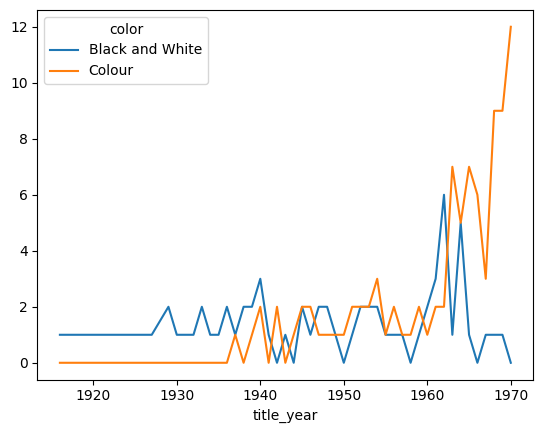

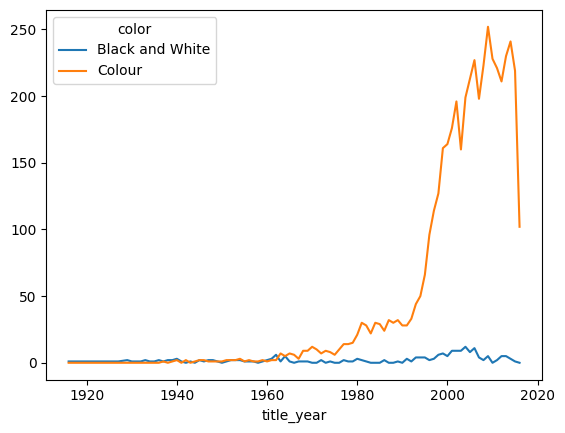

In [46]:
import matplotlib.pyplot as plt
result1.loc[:1970].plot(use_index = True, y= ["Black and White", "Colour"])
result1.plot(use_index = True, y= ["Black and White", "Colour"])
plt.show()

In [47]:
result1.loc[result1['Colour'] == 252] # пик количества снятых фильмов

color,Black and White,Colour,unknown
title_year,,,
2009.0,5,252,1


Итак, наглядное представление данных по числу  позволяет сделать следующие выводы:
* До 1960-х годов число черно-белых фильмов и число цветных было приблизительно одинаковым
* После 1960-х статистика чб и цветных фильмов резко изменилась: наблюдается резкий рост популярности цветных фильмов и спад количества снимаемых двухцветных кинолент
* Рост выпуска цветных картин стремительно продолжался вплоть до своего пика в 2009 (252 фильма). Далее начался небольшой спад цветной киносъемки, однако, как и ожидалось, существенный прирост чб фильмов, выпущенных после этого года, так и не наблюдался.

**ВЫВОД** : гипотеза № 1 почти полностью поддтвердилась. 

*(спад числа цветных фильмов в последнем году (2016) вероятно вызван тем, что данные были записаны не по истечению целого года, а какого-то его периода).*

## *Гипотеза № 2* : Самым популярным жанром фильма во всех странах является комедия, вторым по популярности - ужасы. <a id='hypothesis_2'></a>

In [51]:
# Каждую строчку столбца 'genres' разделить по | и просуммировать все списки, чтобы получить общий список всех жанров
list_of_all_genres d = f['genres'].str.split(pat = "|").sum()

genres = []
count = []
percent = []

for genre in set(list_of_all_genres):
    genres.append(genre)
    count.append(list_of_all_genres.count(genre))
    percent.append(list_of_all_genres.count(genre)/len(list_of_all_genres) * 100)
    
result2 = pd.DataFrame({
    "genres" : genres,
    "count" : count,
    "percent" : percent
})

In [49]:
result2.sort_values(by='count', ascending=False)

,genres,count,percent
15,Drama,2571,17.876512
24,Comedy,1862,12.946739
3,Thriller,1396,9.706578
23,Action,1143,7.947434
1,Romance,1098,7.634543
20,Adventure,914,6.355166
22,Crime,883,6.139619
11,Sci-Fi,611,4.248366
0,Fantasy,604,4.199694
10,Horror,556,3.865944


**ВЫВОД** : гипотеза № 2 не подтвердилась. 

Как оказалось, драма является самым популярным жанром среди кинозрителей по всему миру, а жанры "комедия" и "ужасы" находятся в этом рейтинге только на 2 и 10 местах соответственно.

## *Гипотеза № 3* : Самые кассовые фильмы США - семейное кино (G & PG Movies) <a id='hypothesis_3'></a>

 ***Пояснение: для конкретики будем брать ТОП-15.***

Система рейтингов Американской киноассоциации (англ. MPAA film rating system) — принятая в США система оценки содержания фильма, введённая Американской киноассоциацией (MPAA). В зависимости от полученной оценки, зрительская аудитория картины может быть ограничена за счёт исключения из неё детей и подростков. 

В настоящее время выходящий в американский прокат фильм может получить один из пяти следующих рейтингов:

* G (General Audiences) – All ages admitted. <br>
* 
PG (Parental Guidance Suggested) – Some material may not be suitable for children <br>
* 
PG-13 (Parents Strongly Cautioned) – Some material may be inappropriate for children under  years. <br>
* .
R (Restricted) – Under 17 requires accompanying parent or adult guard. <br>
* n.
NC-17 (Adults Only) – No one 17 and under admit <br>

А также дадим еще несколько пояснений по обозначениям в системе рейтинга фильмов, используемых в фрейме данных:
* Approved - Includes films that have been approved for general release by a board of review
* Unrated - Includes films that have not been submitted for a rating by any moed.

In [50]:
df_usa = df.loc[df['country'] == 'USA', ['movie_title', 'real_domestic_gross', 'content_rating']]
df_usa.sort_values(by = 'real_domestic_gross', ascending = False).head(15)

,movie_title,real_domestic_gross,content_rating
3939,Gone with the Wind,3.430119e+09,G
4413,Snow White and the Seven Dwarfs,3.082181e+09,Approved
3000,Star Wars: Episode IV - A New Hope,1.825541e+09,PG
4608,Bambi,1.513622e+09,Approved
1134,Pinocchio,1.445185e+09,Approved
4193,Fantasia,1.309752e+09,G
3333,The Sound of Music,1.243574e+09,G
4770,Intolerance: Love's Struggle Throughout the Ages,1.211264e+09,Not Rated
2894,Jaws,1.159885e+09,PG
2893,The Exorcist,1.105789e+09,R


**ВЫВОД**: Кажется, гипотеза 3 подтвердилась.

В топ-15 кассовых фильмов в США вошли фильмы "Good Family Films", которые предназначены для детей и семейного просмотра. Исключениеми стали 2 фильма:
* 'The Exorcist' с категорией рейтинга R
* 'Titanic' с категорией рейтинга PG-13